In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import re

df = pd.read_csv('ten-year-scrape.csv', encoding= 'unicode_escape')
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace("-", "_")
df.columns = df.columns.str.lower()
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

/Users/areena.arora/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df['bill_date'] = pd.to_datetime(df['bill_date'], errors='coerce')
df['bill_year'] = df['bill_date'].dt.to_period('Y')

In [3]:
df.trimmed_bill_section.value_counts().head(5).reset_index()

,index,trimmed_bill_section
0,Tax,446
1,Property Tax,314
2,Environmental Conservation,281
3,Public Health,266
4,Education,257


In [4]:
df.groupby(by='sponsor_party').bill_section.count()

sponsor_party
Democrat              3339
Independence Party      55
Independent              6
Republican            1538
Name: bill_section, dtype: int64

In [5]:
df.query('sponsor_party == "Republican"').bill_section.value_counts().head(5)

Tax                               215
Property Tax                      110
Highway                            85
Environmental Conservation         83
Retirement and Social Security     80
Name: bill_section, dtype: int64

In [6]:
df.query('sponsor_party == "Democrat"').bill_section.value_counts().head(5)

Public Health                 204
Tax                           201
Property Tax                  198
Environmental Conservation    188
Education                     186
Name: bill_section, dtype: int64

In [30]:
df.query('trimmed_bill_section == "Environmental Conservation"').sponsor_party.value_counts()

Democrat              188
Republican             83
Independence Party     10
Name: sponsor_party, dtype: int64

<AxesSubplot:>

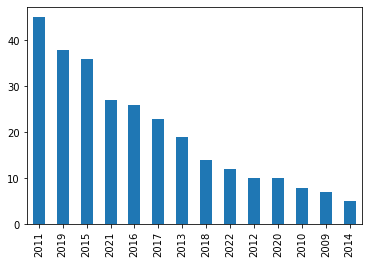

In [14]:
df.query('trimmed_bill_section == "Environmental Conservation"').bill_year.value_counts().plot(kind='bar')

In [28]:
df.query('trimmed_bill_section == "Environmental Conservation"').query('sponsor_party == "Independence Party"')

,bill_number,bill_link,bill_description,bill_date,bill_section,bill_sponsor,sponsor_party,sponsor_name,bill_year,trimmed_bill_section
619,A2294,https://www.nysenate.gov/legislation/bills/2009/a2294/amendment/original,Relates to the taking of fish for commercial purposes,2010-09-17,Environmental Conservation,THIELE,Independence Party,Fred Thiele,2010,Environmental Conservation
905,A7150,https://www.nysenate.gov/legislation/bills/2011/a7150/amendment/original,Relates to the management of squid,2011-08-03,Environmental Conservation,THIELE,Independence Party,Fred Thiele,2011,Environmental Conservation
981,A6959,https://www.nysenate.gov/legislation/bills/2011/a6959/amendment/original,Relates to the management of scallops,2011-08-17,Environmental Conservation,THIELE,Independence Party,Fred Thiele,2011,Environmental Conservation
1386,A6906,https://www.nysenate.gov/legislation/bills/2013/a6906/amendment/original,Extends the authority of the department of environmental conservation to manage squid,2013-06-19,Environmental Conservation,THIELE,Independence Party,Fred Thiele,2013,Environmental Conservation
2204,A7857,https://www.nysenate.gov/legislation/bills/2015/a7857/amendment/original,Extends the authority of the department of environmental conservation to manage squid,2015-08-13,Environmental Conservation,THIELE,Independence Party,Fred Thiele,2015,Environmental Conservation
2746,A6727,https://www.nysenate.gov/legislation/bills/2015/a6727/amendment/original,Extends the time period for the taking of deer in the county of Suffolk from December thirty-first until March thirty-first,2016-07-21,Environmental Conservation,THIELE,Independence Party,Fred Thiele,2016,Environmental Conservation
2747,A9218,https://www.nysenate.gov/legislation/bills/2015/a9218/amendment/original,Relates to extending certain provisions relating to the taking of sharks,2016-07-21,Environmental Conservation,THIELE,Independence Party,Fred Thiele,2016,Environmental Conservation
3028,A7186,https://www.nysenate.gov/legislation/bills/2017/a7186/amendment/original,Extends for three years the effectiveness of chapter 435 of the laws of 2014,2017-06-29,Environmental Conservation,THIELE,Independence Party,Fred Thiele,2017,Environmental Conservation
3479,A6314,https://www.nysenate.gov/legislation/bills/2017/a6314/amendment/original,Authorizes the enactment or enforcement of local laws or ordinances requiring the monitoring of groundwater impacts resulting from mining or the reclamation of mines within certain counties,2018-10-01,Environmental Conservation,THIELE,Independence Party,Fred Thiele,2018,Environmental Conservation
5006,A8724,https://www.nysenate.gov/legislation/bills/2021/a8724,Permits seaweed cultivation in underwater lands at Gardiner's and Peconic bays and commercial fishing licenses,2022-02-24,Environmental Conservation,THIELE,Independence Party,Fred Thiele,2022,Environmental Conservation


In [34]:
df.query('sponsor_party == "Independence Party"').trimmed_bill_section.value_counts()

Environmental Conservation                          10
Suffolk County                                       4
Property Tax                                         4
Retirement and Social Security                       4
General Municipal                                    4
Towns                                                3
Public Authorities                                   3
Public Service                                       2
County                                               2
Local Finance                                        2
Agriculture and Markets                              1
Public Officers                                      1
Highway                                              1
Education                                            1
Municipalities                                       1
Executive Department                                 1
Election                                             1
General City                                         1
Villages  

In [36]:
df.bill_year

0       2009
1       2009
2       2009
3       2009
4       2009
        ... 
5047    2022
5048    2022
5049     NaT
5050     NaT
5051     NaT
Name: bill_year, Length: 5052, dtype: period[A-DEC]